In [1]:
# %load example_agent
"""
This Notebook shows some examples that can be useful for a neural agent.
"""

% matplotlib inline

import beeview
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
renderer = beeview.Renderer("../../data/hessen_2016/scene.obj",
                            "../../data/ommatidia.csv",True)

In [3]:
# render and plot a beeview
renderer.set_num_samples(1)
renderer.position = [0,-80,0]
renderer.direction = [0,0,-1]

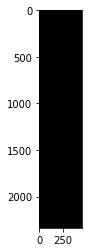

In [4]:
img = renderer.render()
plt.imshow(img)
plt.show()

(500000, 3)


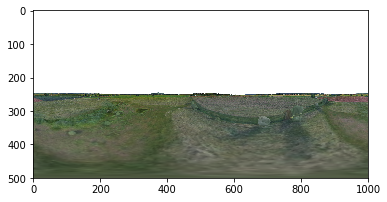

In [6]:
# render panoramic image as flat array with agent function
renderer.mode = renderer.Panoramic
pano = renderer.render_agent()
print(pano.shape)

# reshape the array for display and plot
img = pano.reshape(renderer.get_image_size()[1],renderer.get_image_size()[0],3)
plt.imshow(img)
plt.show()

In [7]:
# back to bee eye mode
renderer.mode = renderer.BeeEye
renderer.set_ommatidium_size(2)
# bee_eye_data is a tuple with data for left and right eye 
bee_eye_data = renderer.render_agent()

left_eye = bee_eye_data["left"]
right_eye = bee_eye_data["right"]

In [8]:
# print data for first 20 ommatidia of left eye
row_format ="{:>20}{:>20}{:>50}{:>30}"
print(row_format.format(*["elevation","azimuth","color","coordinates"]))
for i in range(0,20):
    print(row_format.format(*[str(left_eye["azimuth"][i]),str(left_eye["elevation"][i]),str(left_eye["color"][i]), str(left_eye["coordinates"][i])]))

           elevation             azimuth                                             color                   coordinates
                -0.0                 0.0                                     [nan nan nan]                   [ 93. 674.]
 -1.8501585721969604                0.75                                     [nan nan nan]                   [ 92. 672.]
  -3.700000047683716                 0.0                                     [nan nan nan]                   [ 93. 670.]
 -5.4970221519470215                0.75                                     [nan nan nan]                   [ 92. 668.]
  -7.293111324310303                 0.0                                     [nan nan nan]                   [ 93. 666.]
  -9.038522720336914                0.75                                     [nan nan nan]                   [ 92. 664.]
 -10.782421112060547                 0.0                                     [nan nan nan]                   [ 93. 662.]
 -12.477705001831055            

In [ ]:
# measure distance to next object in down direction
height = renderer.measure_distance(renderer.position,[0,-1,0])
print("Current height: " + str(height))

# set position to be 5m above ground
renderer.position = [renderer.position[0], renderer.position[1] - height + 5, renderer.position[2]]
print("New height: " + str(renderer.measure_distance(renderer.position,[0,-1,0])))

# move agent 1 m to right and 1 m forward and set direction to moving direction
old_pos = renderer.position
renderer.position = [renderer.position[0]+1, renderer.position[1], renderer.position[2]+1]

renderer.direction = np.array(old_pos) - np.array(renderer.position)

img = renderer.render()
plt.imshow(img)
plt.show()